/tmp/ipykernel_23808/1154158454.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([y_label_formatter(x) for x in current_values])


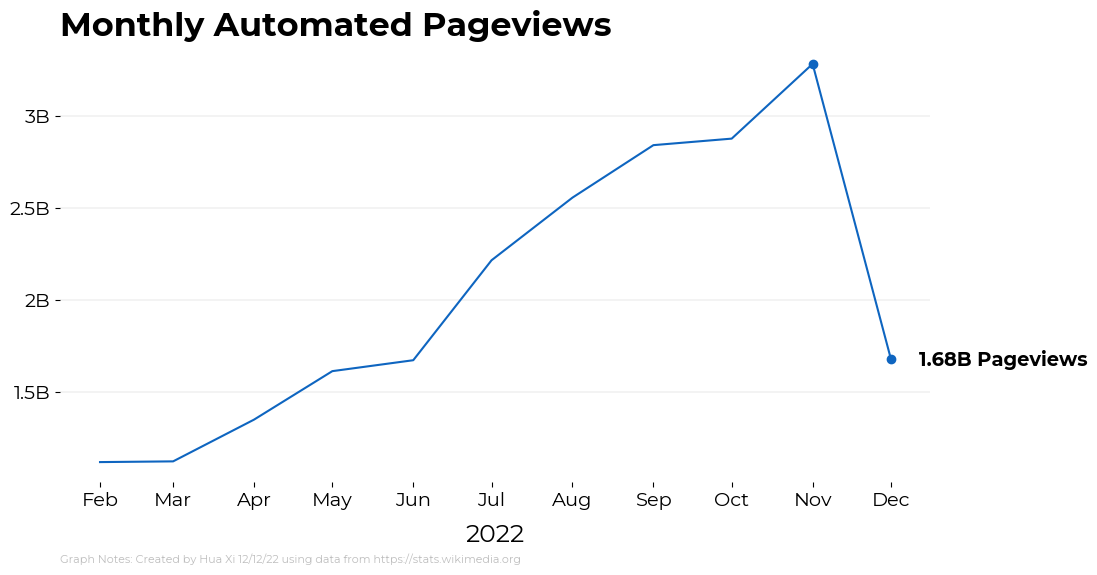

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import font_manager
import os
import numpy as np

#---PROMPT FOR INPUT---
outfile_name = "Pageviews_YoY.png"
note = " "

#---READ IN DATA--
#get current path
home_dir = os.getcwd()

df = pd.read_csv(home_dir + '/data/pageviews_2022.csv')

#display top rows for preview
#df.head()

#---CLEAN DATA--
#look at data types
#print(df.active_editors.dtype)
#print(df.month.dtype)

#convert string to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp')

#truncate to preferred date range
df = df[df["timestamp"].isin(pd.date_range("2022-02-01", "2022-12-01"))]

#---ADJUST PLOT SIZE---
plt.figure(figsize=(12, 6))

#---PREPARE TO PLOT
#create a dictionary for colors
wmf_colors = {'black75':'#404040','black50':'#7F7F7F','black25':'#BFBFBF','blue':'#0E65C0','green50':'#00af89','brightblue':'#049DFF','brightbluelight':'#C0E6FF','yellow':'#F0BC00','green':'#308557','brightgreen':'#71D1B3'}

#add Montserrat file by file (quick fix)
#font_montserrat = matplotlib.font_manager.FontProperties(fname="/srv/home/xihua/Key_Product_Metrics/fonts/Montserrat/static/Montserrat-Regular.ttf")
#font_montserrat_bold = matplotlib.font_manager.FontProperties(fname="/srv/home/xihua/Key_Product_Metrics/fonts/Montserrat/static/Montserrat-Bold.ttf")

font_dirs = [home_dir + "/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

#check added fonts
#result = custom_font_manager.get_font_names()
#print(result)
#add grid lines
plt.grid(axis = 'y', zorder=-1, color = wmf_colors['black25'], linewidth = 0.25)
#linestyle = '--'

#---BREAK DATA INTO SUBSETS
#subset to highlight the last two months
mom_highlight = pd.concat([df.iloc[-2,:],df.iloc[-1,:]],axis=1).T

#---PLOT---
#plot data
plt.plot(df.timestamp, df.sum_view_count,
	label='_nolegend_',
	color=wmf_colors['blue'])

plt.scatter(mom_highlight.timestamp, mom_highlight.sum_view_count,
	label='_nolegend_',
	color=wmf_colors['blue'])

#---FORMATTING---
#add title and labels
plt.title('Monthly Automated Pageviews',font='Montserrat',weight='bold',fontsize=24,loc='left')
plt.xlabel("2022",font='Montserrat', fontsize=18, labelpad=10) #source serif pro
#plt.ylabel("Active Editors",font='Montserrat', fontsize=18)

#expand bottom margin
plt.subplots_adjust(bottom=0.15,left=0.1,right=0.825)

#remove bounding box
for pos in ['right', 'top', 'bottom', 'left']:
	plt.gca().spines[pos].set_visible(False)

#format y-axis labels
def y_label_formatter(value):
	formatted_value = '{:1.1f}B'.format(value*1e-9)
	formatted_value = formatted_value.replace('.0','')
	return formatted_value
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([y_label_formatter(x) for x in current_values])
plt.yticks(fontname = 'Montserrat',fontsize=14)


#add monthly x-axis labels
date_labels = []
for dl in df['timestamp']:
	date_labels.append(datetime.datetime.strftime(dl, '%b'))
plt.xticks(ticks=df['timestamp'],labels=date_labels,fontsize=14,fontname = 'Montserrat')

#---ADD ANNOTATIONS---
#add combined annotation
def annotate():
	pageviews = df['sum_view_count'].iat[-1]
	annotation = '{:1.2f}B Pageviews'.format(pageviews*1e-9)
	plt.annotate(annotation,
		xy = (df['timestamp'].iat[-1],pageviews),
		xytext = (20,-5),
		xycoords = 'data',
		textcoords = 'offset points',
		color='black',
		fontsize=14,
		weight='bold',
		wrap = 'True',
		family='Montserrat')
annotate()

#data notes
plt.figtext(0.1, 0.015, "Graph Notes: Created by Hua Xi 12/12/22 using data from https://stats.wikimedia.org", fontsize=8, family='Montserrat',color= wmf_colors['black25'])

#---SHOW GRAPH---
save_file_name = home_dir + "/charts/" + outfile_name
plt.savefig(save_file_name, dpi=300)
plt.show()